In [21]:
import pandas as pd
import random

import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


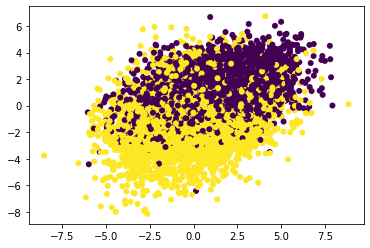

In [5]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=10, n_redundant=0, random_state=101)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)

In [8]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y, Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [9]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:                  0.3671
Time:                        15:32:53   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

In [15]:
Xd = pd.DataFrame(X)
Xd.columns = ['VAR' + str(i+1) for i in range(10)]
Xd['response'] = y
Xd

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,response
0,0.395323,-2.725161,-0.541133,0.173486,-1.260723,2.081627,-1.826010,-0.766091,-0.922892,4.689218,0
1,1.251630,-2.769594,-2.841272,2.967540,-4.135417,0.516627,-2.920334,3.715837,0.864778,-0.643813,0
2,0.780121,-0.834798,-2.278456,1.612990,-0.167470,1.433618,0.834476,1.516371,0.387032,3.247103,0
3,2.606998,-2.669103,0.790373,0.314980,3.648089,-2.311653,-0.932618,1.778850,-2.656872,-0.314914,1
4,1.405366,3.756260,-0.625367,-2.430578,2.949566,2.501313,-3.239355,0.339439,-0.509432,-0.488661,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.031760,1.451367,-0.680201,-2.959116,-4.634749,-0.490695,-1.926860,-2.147785,-1.548778,0.040092,0
9996,3.879460,3.507780,-1.926138,-0.215114,1.888664,1.897846,0.446037,-0.024964,0.785325,-0.164649,0
9997,0.180595,0.115906,-0.201744,-3.754240,-2.707692,-0.492132,3.126190,-1.374346,-1.290748,2.066816,0
9998,1.860926,-1.664279,1.545701,2.212063,1.217608,-1.760231,-1.021019,-0.342267,-3.050819,1.189555,1


In [17]:
logistic_regresssion = smf.logit(formula = 'response ~ VAR1 + VAR2 + VAR3 + VAR4 + VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10', data=Xd)

In [18]:
fitted_model = logistic_regresssion.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:                  0.3671
Time:                        15:44:30   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000       0.353       0.506
VAR1           0.0671      0.015      4.410      0.000       0.037       0.097
VAR2          -0.7828      0.019    -41.947      0.000      -0.819      -0.746
VAR3           0.1221      0.016      7.815      0.000       0.091       0.153
VAR4           0.2841      0.016     18.150      0.000       0.253       0.315
VAR5           0.1469      0.014     10.283      0.000       0.119       0.175
VAR6          -0.3414      0.019    -17.636      0.000      -0.379      -0.303
VAR7           0.0503      0.014      3.481      0.000       0.022       0.079
VAR8          -0.1393      0.014     -9.642      0.000      -0.168      -0.111
VAR9           0.1127      0.014      7.931      0.000       0.085       0.141
VAR10         -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

In [20]:
observations = len(X)
variables = ['VAR' + str(i + 1) for i in range(10)]

In [22]:
def random_w(p):
    return np.array([np.random.normal() for j in range(p)])

In [23]:
def sigmoid(X, w):
    return 1./(1. + np.exp(-np.dot(X, w)))

In [24]:
def hypothesis(X, w):
    return np.dot(X, w)

In [25]:
def loss(X, w, y):
    return hypothesis(X, w) - y

In [26]:
def logit_loss(X, w, y):
    return sigmoid(X, w) - y

In [33]:
def squared_loss(X, w, y):
    return loss(X, w, y) ** 2

In [50]:
def gradient(X, w, y, loss_type=squared_loss):
    gradients = list()
    n = float(len(y))
    for j in range(len(w)):
        gradients.append(np.sum(loss_type(X, w, y) * X[:, j]) / n)
    return gradients

In [51]:
def update(X, w, y, alpha=0.01, loss_type=squared_loss):
    return [t - alpha*g for t, g in zip(w, gradient(X, w, y, loss_type))]

In [55]:
def optimize(X, y, alpha=0.01, eta=10**12, loss_type=squared_loss, iterations=1000):
    standardization = StandardScaler()
    Xst = standardization.fit_transform(X)
    original_means, original_stds = standardization.mean_, X.std()
    Xst = np.column_stack((Xst, np.ones(observations)))
    w = random_w(Xst.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(Xst, w, y))
        new_w = update(Xst, w, y, alpha=alpha, loss_type=logit_loss)
        new_SSL = np.sum(squared_loss(Xst, new_w, y))
        w = new_w
        if k >= 5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            break
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    unstandardized_betas = w[:-1] / original_stds
    unstandardized_bias = w[-1] - np.sum((original_means / original_stds) * w[:-1])
    return np.insert(unstandardized_betas, 0, unstandardized_bias), path, k

In [56]:
alpha = 0.5

In [57]:
w, path, iterations = optimize(X, y, alpha, eta = 10**-5, loss_type=logit_loss, iterations=100000)
print("Theses are our final standardized coefficeints: %s" % w)
print("Rechead after %i iterations" % (iterations + 1))

Theses are our final standardized coefficeints: [ 0.38249358  0.06922744 -0.76503357  0.10552178  0.27193265  0.14396635
 -0.31799013  0.04611114 -0.13522083  0.11975385 -0.43927224]
Rechead after 901 iterations


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
clf = LogisticRegression(C=1E4, tol=1E-25, random_state=101)
clf.fit(X, y)

LogisticRegression(C=10000.0, random_state=101, tol=1e-25)

In [60]:
LogisticRegression(C=10000, random_state=101)

LogisticRegression(C=10000, random_state=101)

In [61]:
coeffs = [clf.intercept_[0]]
coeffs.extend(c)